# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [13]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [14]:
# Change history of this cell
# 2017.01.22
#   - Use numpy instead of pandas for calculations as pointed out in review

minimum_price = np.amin(prices)
maximum_price = np.amax(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **

### 'RM' should have positive correlation with price. 
* More rooms --> bigger the apartment --> more expensive
* This could also give indication about the neighborhood. 
** If there are only couple of rooms on average it could mean that neighborhood is for sinle people and for students
** More rooms could indicate neighborhood with families
** If there are really a huge number of rooms then area is high end living area

### 'LSTAT' should have negative correlation with price
* High percentage means that neighborhood is for lower class people who can't afford more expensive apartment
* Also if we think about apartment quality. Lower class people perhaps doesn't pay much attention to it and therefore apartments are cheaper.

### 'PTRATIO' should have positive correlation with price
* Public schools have less teachers per student --> neighborhood is for lower class people
* Private schools have more teachers per student --> neighborhood is for mid to high class people
* People from rich families tend to go to private schools more than people from lower income families. ( I guess this should be more true in US than in Scandinavia )





----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [15]:
from sklearn.metrics import r2_score


def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [16]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:** Coefficient of determination (R^2) is **0.923** which suggest that predictions have small error and model predicts y values well.

* R^2 = 1: Best possible score --> no error
* R^2 = 0: Model predicts same y value regardless of input features
* R^2 < 0: Model is more worse

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [17]:
from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(features, target_medv, train_size=0.8, random_state=12345)
X_train, X_test, y_train, y_test = train_test_split(features, prices, train_size=0.8, random_state=12345)
# Success
print "Training and testing split was successful."
# Check that we got split ratio correctly
print "Allocation of training set is: ", len(X_train), " samples"
print "Allocation of test set is: ", len(X_test), " samples"

Training and testing split was successful.
Allocation of training set is:  391  samples
Allocation of test set is:  98  samples


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: ** Reason to split dataset into training and test sets is that we can use training set to train algorithm and test it with 'unseen' data. If we use training set to test algorithm then there is risk that the results we get are way too optimistic. For example algorithm could overfit data: testing by training set could lead to very good results, but when algorithm is tested with unseen data it will give worse results.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

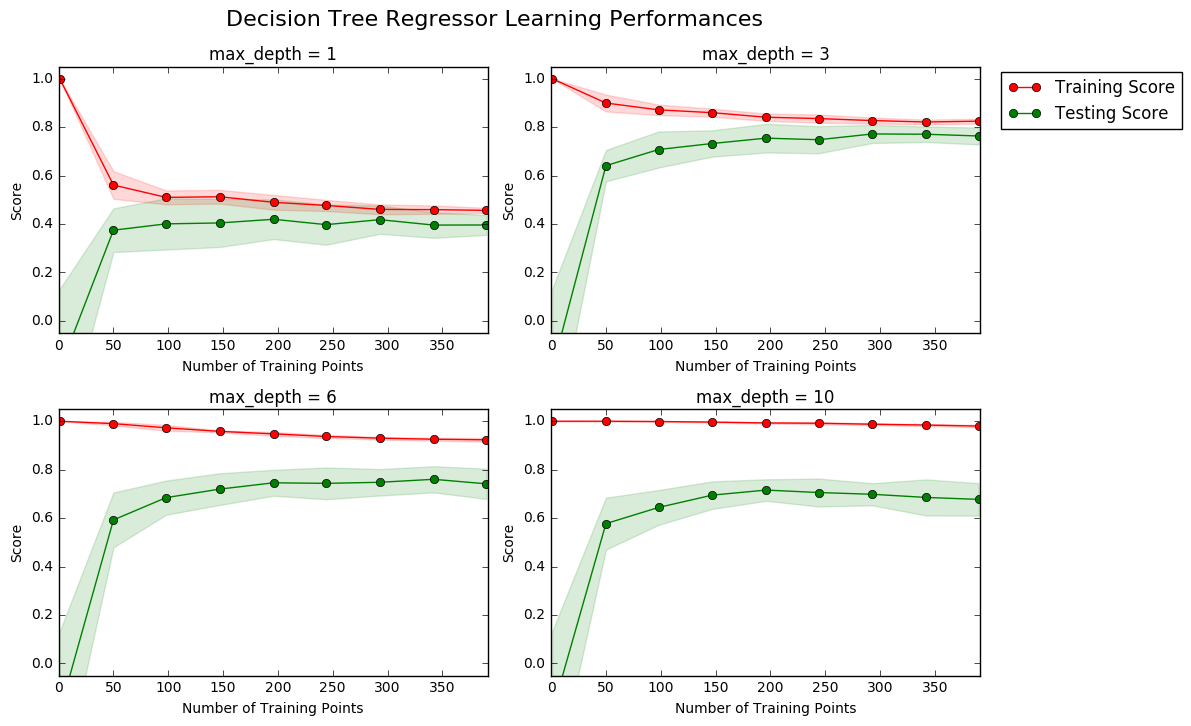

In [18]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: ** I selected graph with max_depth=3. 

In beginning of the curve where number of training points is low, 1 or very close to it. We can see that training score is near 1 and testing score is near 0. This is because model is overfitting data and can't generalize on new unseen data. As we add more training points then model can generalize better on data. From the curve we can see that when more training data is added the training and testing scores are approaching 0.8 score.

From the graph we can also conclude that adding more than 300 training points provide very little extra value.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

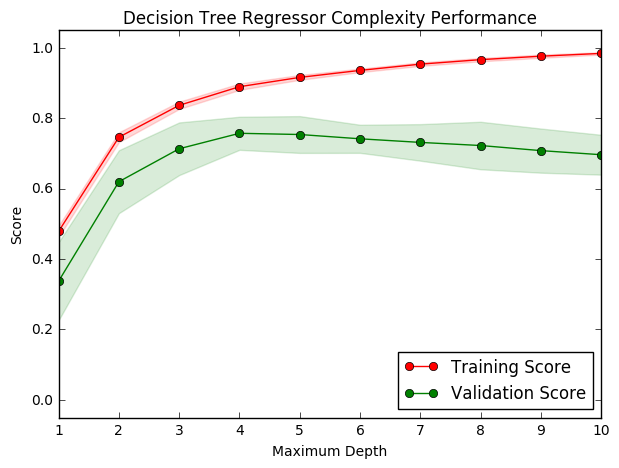

In [19]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **
Short answer is: Maximum Depth 1 suffers from high bias and Maximum Depth 10 suffers from high variance

Reasoning behind this is

#### Maximum depth 1
Training and testing scores are low which means model does poorly with training and test data. In otherwords model can't use input features to predict on new data and suffers from high bias. Variance is low because training and validation scores are close to each other. Visual cue is that curves are quite close to each other, but score is low.

#### Maximum depth 10
Training data gives good results, but on testing data we get bad results. This means that model can't generalize on unseen data and suffers from high variance. Visual cue is that after **maximum depth = 3** curves begin to diverge and training scores get higher and validation scores get lower.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: ** Maximum scores on testing data are achieved when max_depth is between 4 and 6. I would select max_depth=4 as the optimum because it minimizes distance between training and test scores.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: ** Grid search is a way to easily test and tune model(estimator) with different hyper-parameters. Usually estimators have few key hyper-parameters which affects model complexity and accuracy most. For example kernel, C and gamma paramaters.
By using grid search you can easily evaluate how parameters affects model performance. 

In your code you need to list parameters and their values which you want to include to your parameter tuning

Let's assume we use SVC estimator and want to test how kernel and C values affects preductions.
- Kernels values we want to test are 'linear' and 'rbf'
- C values are 1 and 10

| kernel |  C    |
| :----: | :---: |
| linear | 1     |
| rbf    | 10    |


Then what happens is that training and testing is run for each of hyper-parameter combinations.
Results can be then evaluated and choosing the best combination should be easy.



### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer:** 

In k-fold cross-validation the dataset is divided into several groups(folds), where **k** is number of the groups. These groups can be then trained and tested separately. **k -1 ** groups are used for training and remaining one group is used for testing. Each of the groups are used for once for validation and remaining (k-1) groups are used for training. 

Benefit compared to splitting dataset into train and test data is that K-fold cross-validation uses all data for training and testing. For example when we don't have much training data available we can use all data as efficiently as possible and be more assured about the model performance. Performance measure of K-fold cross-validation is more reliable and variance is reduced because average is calculated in the loop which is repeated k times. 

There is one thing which needs special attention. If your data set is sorted according to some parameter then you got problems because data is split consecutively. Fortunately there is way to randomize data by setting '''shuffle=True'''.

There is also one drawback as K-fold cross-validation tend to be computationally expensive when training set is big or model is complex because training is repeated k-1 times.

K-fold cross-validation benefits grid search by providing better reliability compared to train_test_split. Variation is reduced so it is lesslikely that we got over optimistic results by chance.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_iter'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [20]:
# Change history of this cell
# 2017.01.23
#   - Fix range function number range 

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
import sklearn


def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1, 11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    #scoring_fnc = make_scorer(regressor.score)
    scoring_fnc = make_scorer(sklearn.metrics.r2_score)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, param_grid=params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [21]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "max_depth parameter with value {} is optimal value.".format(reg.get_params()['max_depth'])

max_depth parameter with value 4 is optimal value.


**Answer: ** Optimal value for max_depth=5. Guess in question 6 was quite close to the optimal value.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [22]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $425,988.89
Predicted selling price for Client 2's home: $232,011.11
Predicted selling price for Client 3's home: $886,900.00


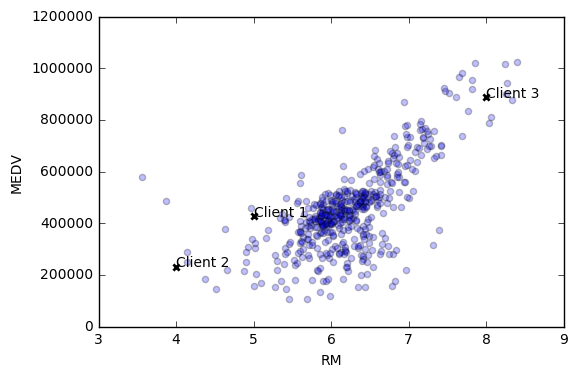

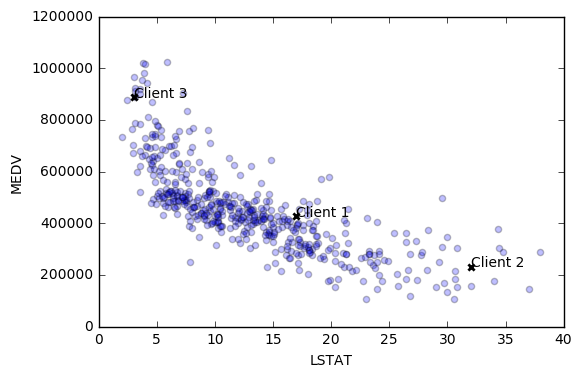

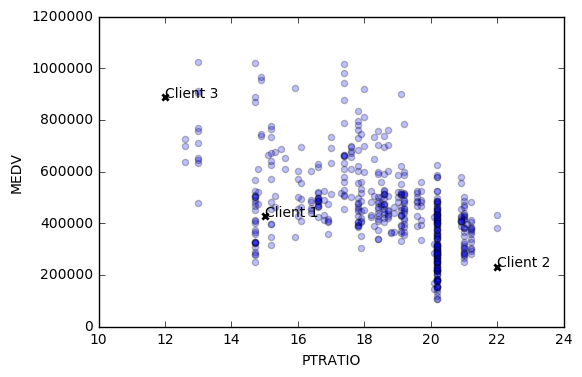

In [23]:
# This way of analysing features and predictions I learned from previous interview 
# I think it is really good way of analyzing results so i include it here.
# In addition I added annotations for client's data points for easier reading

from matplotlib import pyplot as plt
clients = np.transpose(client_data)
pred = reg.predict(client_data)
for i , feat in enumerate(['RM', 'LSTAT', 'PTRATIO']):
    plt.scatter(features[feat], prices, alpha=0.25)
    plt.scatter(clients[i], pred, color='black', marker='x', linewidths=2)
    #plt.annotate("Client {}".format(i), xy=clients[i])
    plt.xlabel(feat)
    plt.ylabel('MEDV')
    # Add annotations
    for j in range(0,3):
        xy = clients[i][j], pred[j]
        plt.annotate("Client {}".format(j+1), xy=xy)
    plt.show()

**Answer: **

### Summary
For comparison below is list of features and recommended selling prices generaged by prediction model. 

| Feature  | Client 1  | Client 2  | Client 3  |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
| Predicted Price | \$419k | \$287k | \$927k |

### Sanity Check
Quick and dirty sanity check would be to compare recommended prices to dataset statistics.
And we can quickly see that recommended prices for 3 clients are within the minimum and maximum prices.
Also mean and median prices of dataset and 3 clients predicted prices are quite enough. Need to remember that calculating statistics from 3 predicted values will not give accurate picture of how prediction works with bigger dataset.

- Minimum price: \$105,000.00
- Maximum price: \$1,024,800.00
- Mean price: \$454,342.94
- Median price \$438,900.00
- Standard deviation of prices: \$165,340.28

Looks like RM', 'LSTAT', and 'PTRATIO' are changing predicted prices to correct direction, but still it is hard to tell accurately from these 3 predicted prices. 

### Detailed analysis
Below is detailed analysis for each clients

#### Client 1
We got reasonable predictions for client 1 because:
* RM vs. MEDV is above average in region of 5 rooms
* LSTAT vs. MEDV is just bit above average in region of 17%
* PTRATIO vs. MEDV is slighly less than average in region of 15-to-1

#### Client 2
We got reasonable predictions for client 2 because:
* RM vs. MEDV is near average in region of 4 rooms
* LSTAT vs. MEDV is near or bit above average in region of 32%
* PTRATIO vs. MEDV is below average in region of 22-to-1

#### Client 3
We got reasonable predictions for client 3 because:
* RM vs. MEDV is sligtly less than average in region of 8 rooms
* LSTAT vs. MEDV is above average in region of 3%
* PTRATIO vs. MEDV as there are no data in region of 12-to-1 we can still estimate from graph that value would be near average.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [24]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

Personally i wouldn't use this model to recommend house prices as there are several issues. 

### Training Data 
is way too old. Ok. you are able to get hunch how different features could affect price. For example we know that when there are more teachers per student it will have positive impact to price, but how do we know how much studen/teacher ratio affects prices in year 2016? There should be way to verify model with up-to-date data and after that we could make conclusion whether model is good or not.

### Features
In most cases model should give fairly good *generalized* estimation of the price. There are still more features what will affect to the prices.
Such as 
- General condition of apartment. 
- Big repair and maintenance projects in near future.
- View from the apartment. e.g. If there are sea or lake view it should have positibe effect on price.
- Public transportation near apartment

Those are only a few examples which will have impact on house selling price in real life.

### Robustnes
Model is robust enough to give general prediction of selling price, but again we need to use more features in order to get correct selling price for given apartment.

### Location
If we want to predict house selling prices of other areas and cities than Boston then we need to have training data from those areas. By using Boston dataset to train model which predicts house selling prices in other area would give inaccurate predictions. Prices might be affected by different factors and/or feature may affect in different ratio. Also there could be different offset in house prices.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.